In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')


In [ ]:
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
# === 1. Load libraries ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === 2. Load dataset ===
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()
print("Showed Info")

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Showed Info


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


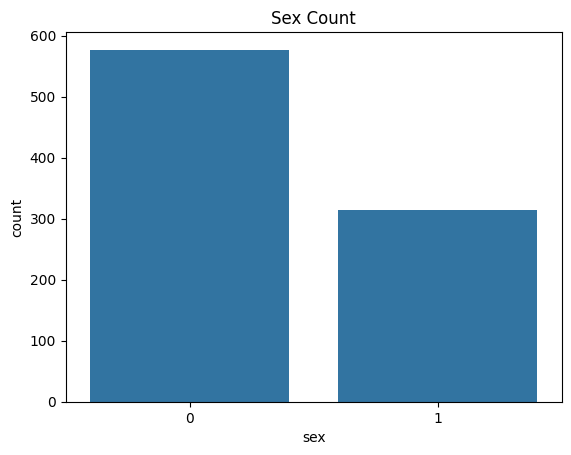

In [ ]:
sns.countplot(data=df, x='sex')
plt.title('Sex Count')
plt.show()

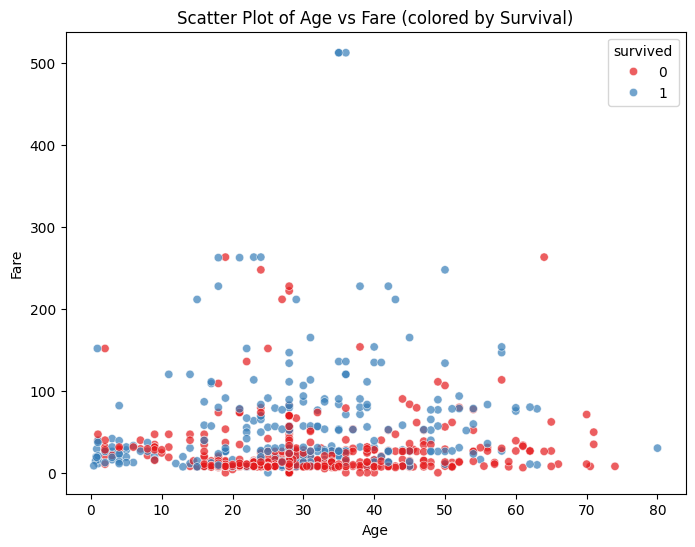

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='fare', hue='survived', alpha=0.7, palette='Set1')
plt.title('Scatter Plot of Age vs Fare (colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


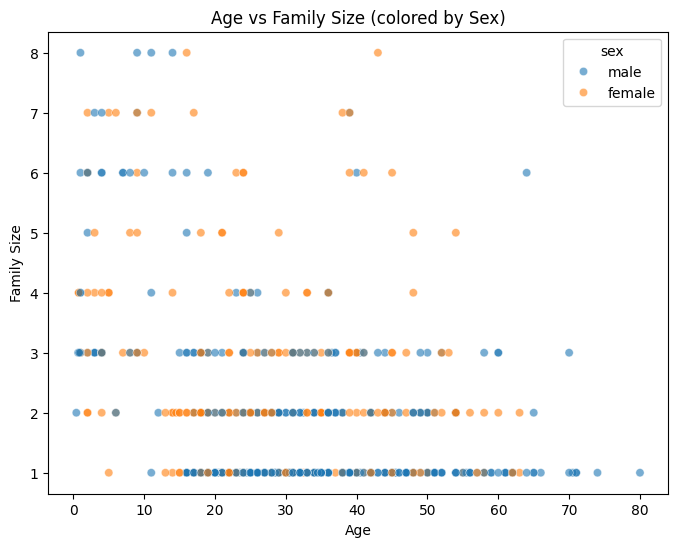

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='family_size', hue='sex', alpha=0.6)
plt.title('Age vs Family Size (colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.show()


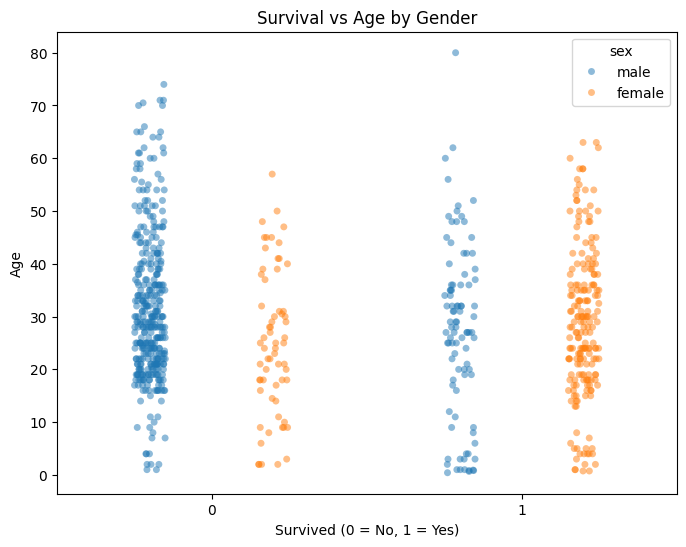

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x='survived', y='age', jitter=True, hue='sex', dodge=True, alpha=0.5)
plt.title('Survival vs Age by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


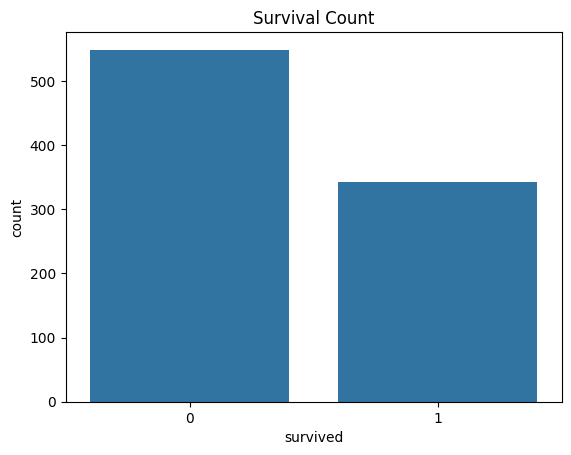

In [ ]:
# Survival counts
sns.countplot(data=df, x='survived')
plt.title('Survival Count')
plt.show()

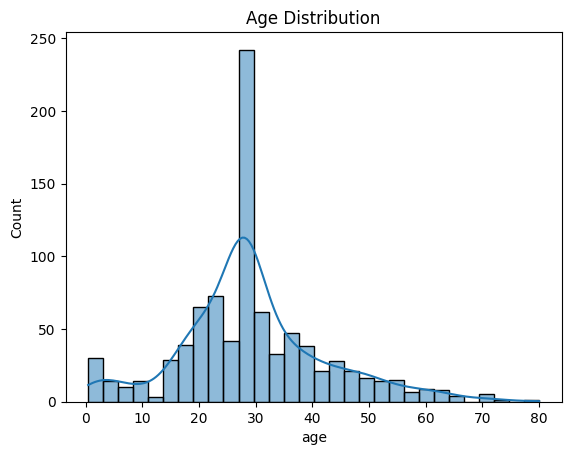

In [ ]:
# Age distribution
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()



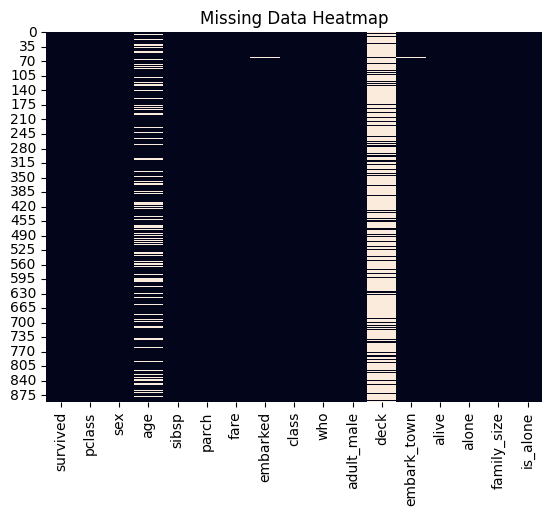

In [ ]:
# Heatmap for missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill embarked with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
# Drop deck due to too many nulls
df.drop(columns=['deck'], inplace=True)

df.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
# Create new feature: family_size
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [ ]:


# Create binary: is_alone
df['is_alone'] = (df['family_size'] == 1).astype(int)
# Encode categorical features
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


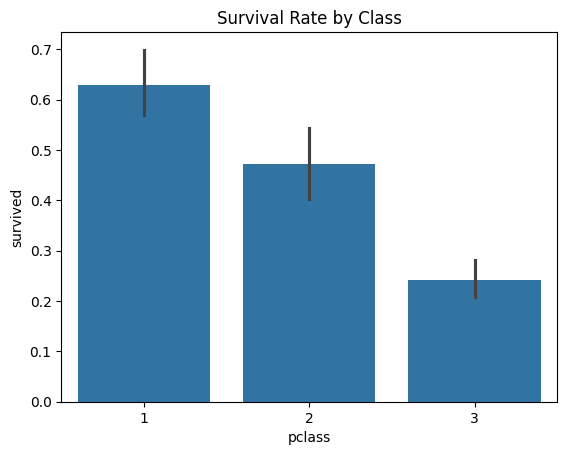

In [ ]:


# Insight: Who had more chance to survive?
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Class')
plt.show()



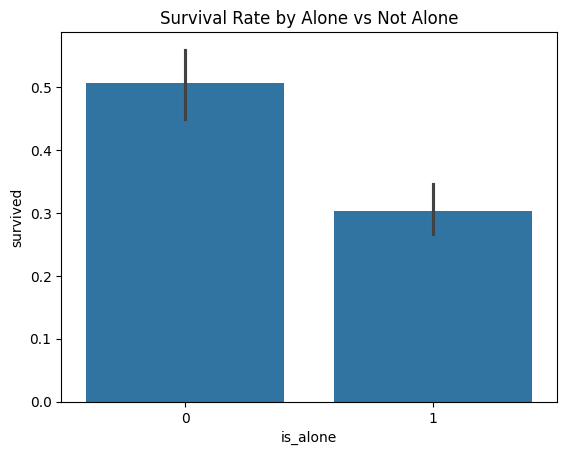

In [ ]:
sns.barplot(x='is_alone', y='survived', data=df)
plt.title('Survival Rate by Alone vs Not Alone')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features = ['pclass', 'sex', 'age', 'fare', 'embarked', 'family_size', 'is_alone']
X = df[features]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7988826815642458
